# E-commerce customer's data exploration and segmentation

### Introduction:

The DataFrame contains the information about customer's purchases across United Kingdom. There are nearly about 4000 customers and their purchases during the period of one year (from 2010-12-01 to 2011-12-09). 

**The objective is to amplify the efficiency of marketing strategies and boost sales through customer segmentation. We aim to transform the transactional data into a customer-centric dateset by creating new features that will facilitate the segmentation of customers into distinct groups using the k-means clustering algorithm**. This segmentation will allow us to understand the distinct profiles and preferences of different customer groups. We then intend to develop a **recommendation system** that will suggest top-selling products to customers within each segment who haven't purchased those items yet, ultimately enhancing marketing efficiency and increasing sales.


The analysis will be divided into several parts:

**1. Data Importing and Data Cleaning.**

**2. EDA**

**3. Cohort Analysis of customers based on Time Cohorts.**

**4. Recency, Frequency and Monetary Value Analysis (RFM).**

**5. Customer Segmentation using K-Means Algorithm**: Segment customers into distinct groups using K-means, facilitating targeted marketing and personalized strategies.

**6. Recommendation System.**: Implement a system to recommend best-selling products to customers within the same cluster who haven't purchased those products, aiming to boost sales and marketing effectiveness.

### Terminology:

**1. Cohort** - group of people (users, individuals and etc.) who have a common characteristic(-s) during a period of time.

**2. Cohort Analysis** - group users based on common characteristics to understand their retention and churn.

**3. Retention** - the continued possesion, use, or control something.

**4. Churn** - the user (customer) who has stopped using the service.

## Part1
### Step1: Imports

In [1]:
# for data manipulation and analysis
import pandas as pd
import numpy as np

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
sns.set_style('darkgrid')

# Silhouette analysis
from sklearn.metrics import silhouette_score

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# for scaling
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("/Users/lexicai/Downloads/ecommerce-data.csv",encoding='unicode_escape')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Display names and types of data:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
# Check the number of rows and columns

df.shape

(541909, 8)

In [6]:
# Summary statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


### Observations:
- The average `quantity` of products in a transaction is approximately 9.55; It has a wide range, within a minimum value of 80995 and a maximum value of 80995; The sd is large, indicating a significant spread in data.
- The average `UnitPrice` is 4.611, ranging from -11062.06 to 38970; The negative part doen't make sense.
- `CustomerID`starts from 12346 to 18287. The total count of 406829 means that there are missing values.

In [8]:
# Summary statistics for categorical variables

df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


### Step2: Clean Data

This step encompasses a comprehensive `cleaning` and `transformation` process to refine the dataset. It includes addressing `missing values`, eliminating `duplicates`, correcting `anomalie`s in stock codes and descriptions, and other necessary adjustments to prepare the data for in-depth analysis and modeling.

The reason we focus on `StockCode`,`Desciption` and `UnitPrice` is that those three categories will be directly related to identify customers buying behaviors. It's important to ensure those data are correct before segmenting customers.

In [9]:
# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicates
duplicate_rows = df.duplicated().sum()

print(missing_values) 
print("--"*10)
print(duplicate_rows)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
--------------------
5268


### Remove Duplicates

In the context of this project, the presence of completely identical rows, including identical transaction times, suggests that these might be data recording errors rather than just repeated transactions. Keeping these duplicates can lead to noise and potential inacuracies in the clustering and recommendation system.

Therefore, I need to remove these rows to achieve a cleaner dataset, aiming to build more accurate customer clusters based on their unique purchasing behaviours.

In [10]:
df = df[~df.duplicated()]
df.shape

(536641, 8)

In [11]:
df.duplicated().sum()

0

In [12]:
df.dropna(inplace = True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**`Stock_id`** : An object data type column represent the product code for each item. By calculating the number of them, we can find the most popular items among customers.

In [13]:
# Top10 stock_id that sold the most

df.StockCode.value_counts().head(10)

85123A    2065
22423     1894
85099B    1659
47566     1409
84879     1405
20725     1346
22720     1224
POST      1196
22197     1110
23203     1108
Name: StockCode, dtype: int64

In [14]:
# Top10 popular items

print(f"The most popular items in Ecommer shop are:\n{df['Description'].value_counts()[:10]}.")

The most popular items in Ecommer shop are:
WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
LUNCH BAG RED RETROSPOT               1345
SET OF 3 CAKE TINS PANTRY DESIGN      1224
POSTAGE                               1196
LUNCH BAG  BLACK SKULL.               1099
PACK OF 72 RETROSPOT CAKE CASES       1062
Name: Description, dtype: int64.


In [17]:
# Check descriptive data again

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,401604.0,12.183273,250.283037,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,401604.0,3.474064,69.764035,0.0,1.25,1.95,3.75,38970.0
CustomerID,401604.0,15281.160818,1714.006089,12346.0,13939.00,15145.00,16784.00,18287.0


In [18]:
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,401604,22190,576339,542
StockCode,401604,3684,85123A,2065
Description,401604,3896,WHITE HANGING HEART T-LIGHT HOLDER,2058
InvoiceDate,401604,20460,11/14/2011 15:27,543
Country,401604,37,United Kingdom,356728


1. We find that some `Quantity` is negative, which can be contributed to return.
2. Some `UniPrice` is 0, which is worth of doing further investigation.

In [19]:
df[df["Quantity"]<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


#### Observations:

After pulling out `Quantity` which is negative, I notice that the `InvoiceNo` starts with `C`, and that means the transaction was cancelled. I will identify these transactions by filtering the rows where the `InvoiceNo` starts with "C". Subsequently, I will analyse these rows to understand their common characteristics or patterns.

It is also worthy noting that there are unusual numbers in `StockCode`, so in the following work, I will also identify anomalies in `StockCode`.

In [22]:
# Create a new column of 'Transaction_Status' to distinguish transaction status

df["Transaction_Status"] = np.where(df["InvoiceNo"].astype(str).str.startswith("C"), "Cancelled","Completed")
df["Transaction_Status"].sample(5)

534567    Completed
106586    Completed
119105    Completed
303880    Completed
194366    Completed
Name: Transaction_Status, dtype: object

In [23]:
# Create a DF that transaction got cancelled

cancelled_transactions = df[df["Transaction_Status"]=="Cancelled"]
cancelled_transactions.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,8872.0,-30.774910,1172.249902,-80995.00,-6.00,-2.00,-1.00,-1.0
UnitPrice,8872.0,18.899512,445.190864,0.01,1.45,2.95,4.95,38970.0
CustomerID,8872.0,14990.152953,1708.230387,12346.00,13505.00,14868.00,16393.00,18282.0


#### Observations:

`UnitPrice`:Standard deviation of 445 and a mean of 18.89, it indicates that there is a wide range of values, price from low to high. The transaction of cancellation happend 8872 times.

In [25]:
# Find the percentage of cancelled transactions
cancelled_percentage = (len(cancelled_transactions) / len(df)) * 100

# Print the percentage of cancelled transactions
print(f"The percentage of cancelled transactions in the dataset is: {cancelled_percentage:.2f}%")

The percentage of cancelled transactions in the dataset is: 2.21%


### Strategy for Handling Cancelled Transactions:

From the above result, the cancellation accounts for 2.21%. It's imperative to understand why the cancellation happened.

The **Recommendation System** could possibly prevent promoting products that have a high likelihood of being cancelled,to ensure that marketing promotion is more accurate.

### Identify Anomalies in StockCode

In [42]:
# Find the number of numeric characters in each unique stock code
unique_stock_codes = df['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(i.isdigit() for i in str(x))).value_counts()

# Print the value counts for unique stock codes
print("Value counts of numeric character frequencies in unique stock codes:")
print("-"*70)
print(numeric_char_counts_in_unique_codes)

Value counts of numeric character frequencies in unique stock codes:
----------------------------------------------------------------------
5    3676
0       7
1       1
dtype: int64


#### Observations:

- A majority of the unique stock codes (3676 out of 3684) contain exactly 5 numeric characters, which seems to be the standard format for representing product codes in this dataset.
- There are a few anomalies: 7 `StockCode` contain no numeric characters and 1 `StockCode` contains only 1 numeric character. These are clearly deviating from the standard format and need further investigation to understand their nature and whether they represent valid product transactions.

In [43]:
# Find and print the StockCode with 0 and 1 numeric characters
# These will be anomalities:

anomalous_stock_codes = [code for code in unique_stock_codes if sum(i.isdigit() for i in str(code)) in (0, 1)]

# Printing each stock code on a new line
print("Anomalous stock codes:")
print("-"*22)
for code in anomalous_stock_codes:
    print(code)

Anomalous stock codes:
----------------------
POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


In [44]:
# Calculate the percentage of records with these stock codes
percentage_anomalous = (df['StockCode'].isin(anomalous_stock_codes).sum() / len(df)) * 100

# Printing the percentage
print(f"The percentage of records with anomalous stock codes in the dataset is: {percentage_anomalous:.2f}%")

The percentage of records with anomalous stock codes in the dataset is: 0.48%


#### Observations:

Based on the analysis, we find that a very small proportion of the records, 0.48%, have anomalous stock codes, which deviate from the typical format observed in the majority of the data. Also, these anomalous codes are just a fraction among all unique stock codes (only 8 out of 3684).

These codes seem to represent non-product transactions like **BANK CHARGES**, **POST**  (possibly postage fees), etc. Since they do not represent actual products and are a very small proportion of the dataset, including them in the analysis might introduce noise and distort the clustering and recommendation system.

Given the context of the project, where the aim is to cluster customers based on their product purchasing behaviors and develop a product recommendation system, it would be prudent to exclude these records with anomalous stock codes from the dataset. This way, the focus remains strictly on genuine product transactions, which would lead to a more accurate and meaningful analysis.

In [45]:
# Remove rows with anomalous stock codes from the dataset

df = df[~df['StockCode'].isin(anomalous_stock_codes)]
df.shape

(399689, 9)

### Identify `Description`

The normal format is composed of all capitalized letters, so we need to find out anomalits in `Description` to indentify which are irrelevant to customers' buying behaviors.

In [61]:
ld = df["Description"].unique()
# char.islower(): identify description with lower case
# any(): return True if at least one character in the description is a lowercase letter
ld = [des for des in ld if any(char.islower()for char in des)]
print(ld)
print(len(ld))

['BAG 500g SWIRLY MARBLES', 'POLYESTER FILLER PAD 45x45cm', 'POLYESTER FILLER PAD 45x30cm', 'POLYESTER FILLER PAD 40x40cm', 'FRENCH BLUE METAL DOOR SIGN No', 'BAG 250g SWIRLY MARBLES', 'BAG 125g SWIRLY MARBLES', '3 TRADITIONAl BISCUIT CUTTERS  SET', 'NUMBER TILE COTTAGE GARDEN No', 'FOLK ART GREETING CARD,pack/12', 'ESSENTIAL BALM 3.5g TIN IN ENVELOPE', 'POLYESTER FILLER PAD 65CMx65CM', 'NUMBER TILE VINTAGE FONT No ', 'POLYESTER FILLER PAD 30CMx30CM', 'POLYESTER FILLER PAD 60x40cm', 'FLOWERS HANDBAG blue and orange', 'Next Day Carriage', 'THE KING GIFT BAG 25x24x12cm', 'High Resolution Image']
19


#### Observations:

There are 19 `Description` that doesn't match the normal format, and among them, the `Next Day Carriage` and `High Resolution Image`seemed to be unrelated to the actual products but more related to the service.

#### Strategy:

Remove the rows where the `Description`contains `Next Day Carriage` and `High Resolution Image`.

In [63]:
service_des = ["Next Day Carriage","High Resolution Image"]
df = df[~df["Description"].isin(service_des)]
df.shape

(399606, 9)

### Identify `UnitPrice`

From the previous work, I notice that some `UnitPrice` are equal to 0, so let's investigate that part.

In [74]:
df[df["UnitPrice"]==0].describe()[["Quantity"]]

,Quantity
count,33.000000
mean,420.515152
std,2176.713608
min,1.000000
25%,2.000000
50%,11.000000
75%,36.000000
max,12540.000000


#### Observations:

From the above DF, we can see there are 33 quantities with `UnitPrice` of 0. It will need more information to check why those items charged free, but I know that these rows should be removed.

In [85]:
# Remove 'UnitPrice'=0 and 'Cancellation Status'

df = df[df['UnitPrice'] > 0]
df = df[df["Transaction_Status"]=="Completed"]
df.describe()

,Quantity,UnitPrice,CustomerID,Amount
count,391068.000000,391068.000000,391068.000000,391068.000000
mean,13.147844,2.871841,15295.134849,22.338828
std,180.826701,4.281445,1710.345760,310.965018
min,1.000000,0.040000,12346.000000,0.060000
25%,2.000000,1.250000,13969.000000,4.950000
50%,6.000000,1.950000,15158.000000,11.900000
75%,12.000000,3.750000,16794.000000,19.800000
max,80995.000000,649.500000,18287.000000,168469.600000


In [86]:
df.shape

(391068, 10)

## Part 1: Data Cleaning is finished

In this step, I put lots of effort to investigate categories that are related to customers' buying behaviors, and remove duplicates, missing values and anomalies in those categories. At these point, there are 391068 valid transactons.

### Review:
1. `StockCode`: I identify "Cancellation" through spotting negative numbers.
2. `Description`: I identify two items that may be related to service.
3. `UnitPrice`: I remove unitprice is 0 as it's clearly wrong in this context. It would require further investigation why there are 33 of them in the record.

## Part 2: EDA

In this part, I will get some key information based on the dataset I just cleaned.

In [92]:
# Total Spent by customers

df['Amount'] = df['Quantity']*df['UnitPrice']
df['Amount'].describe()
print(f"The max spent was {df['Amount'].max()}, minimum spent was {df['Amount'].min()} and the average was {df['Amount'].mean():.2f}.")

The max spent was 168469.6, minimum spent was 0.06 and the average was 22.34.


In [96]:
# Convert InvoiceDate to datetime type

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print(f"The transaction range was from {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}.")

The transaction range was from 2010-12-01 08:26:00 to 2011-12-09 12:50:00.


In [97]:
# Check the number of customers

print(f"There are {len(df['CustomerID'].value_counts())} customers in total.")

There are 4334 customers in total.


In [98]:
# Check selling categories of selling items

print(f"The number of categories of items are {(len(df['Description'].value_counts()))}.")

The number of categories of items are 3869.


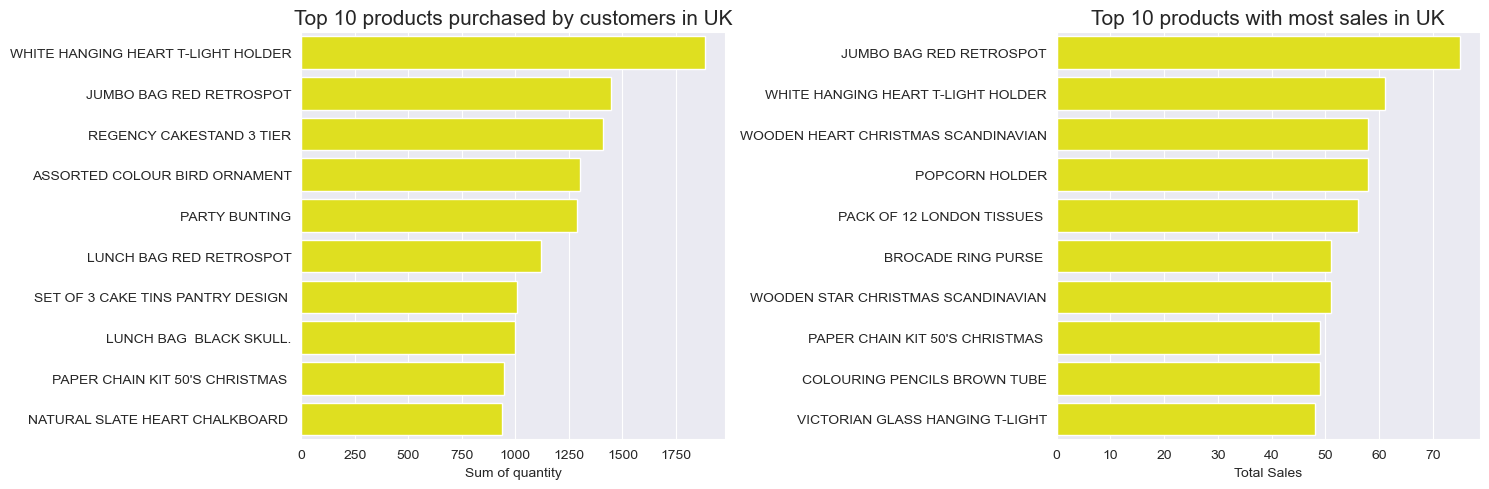

In [99]:
column = ['InvoiceNo','Amount']

plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    # i: index;
    # j: value
    plt.subplot(1,2,i+1)
    sns.barplot(x = df[df['Country']=='United Kingdom'].groupby('Description')[j].nunique().sort_values(ascending=False).head(10).values,
                y = df[df['Country']=='United Kingdom'].groupby('Description')[j].nunique().sort_values(ascending=False).head(10).index,
                color='yellow')
    plt.ylabel('')
    if i==0:
        plt.xlabel('Sum of quantity')
        plt.title('Top 10 products purchased by customers in UK',size=15)
    else:
        plt.xlabel('Total Sales')
        plt.title('Top 10 products with most sales in UK',size=15)
        
plt.tight_layout()
plt.show()

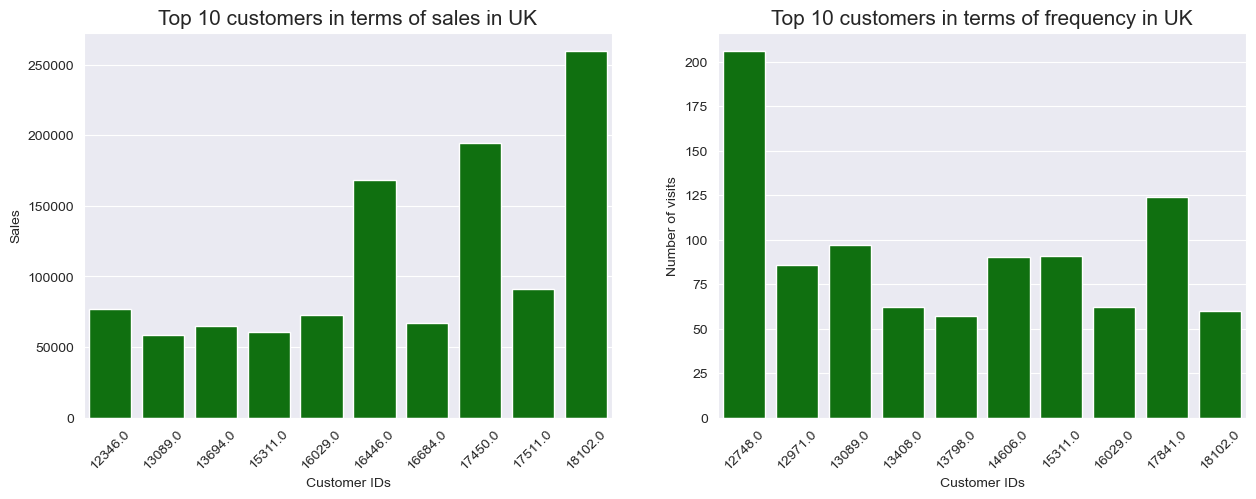

In [115]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(y = df[df['Country']=='United Kingdom'].groupby('CustomerID')['Amount'].sum().sort_values(ascending=False).head(10).values,
            x = df[df['Country']=='United Kingdom'].groupby('CustomerID')['Amount'].sum().sort_values(ascending=False).head(10).index, 
            color='green')
plt.ylabel('Sales')
plt.xlabel('Customer IDs')
plt.xticks(rotation=45)
plt.title('Top 10 customers in terms of sales in UK',size=15)

plt.subplot(1,2,2)
sns.barplot(y = df[df['Country']=='United Kingdom'].groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(10).values,
            x = df[df['Country']=='United Kingdom'].groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(10).index, 
            color='green')
plt.ylabel('Number of visits')
plt.xlabel('Customer IDs')
plt.xticks(rotation=45)
plt.title('Top 10 customers in terms of frequency in UK',size=15)

plt.show()


In [100]:
# Create Amount for exploratory

df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
# df['Hour'] = df['InvoiceDate'].dt.hour
# df['Day_of_week'] = df['InvoiceDate'].dt.dayofweek
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,Amount,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,15.30,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,22.00,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34,2010,12,1


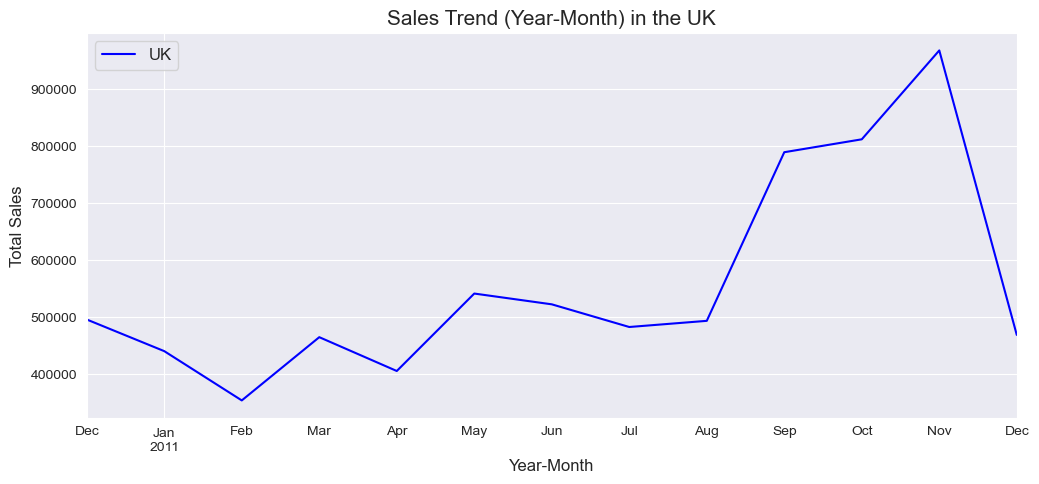

In [106]:
# Create a new column and assume the format is '%Y-%m'

df['Year-Month'] = pd.to_datetime(df['Year-Month'], format='%Y-%m')

plt.figure(figsize=(12, 5))

# We only focus on study of customers' behaviors based on UK
uk_data = df[df['Country'] == 'United Kingdom']
uk_data.groupby(['Year-Month'])['Amount'].sum().plot(kind='line', label='UK', color='blue')

plt.xlabel('Year-Month', size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales Trend (Year-Month) in the UK', size=15)
plt.legend(fontsize=12)
plt.show()

#### Observartions:

The above graph shows the Sales Trend from Dec 2010 to Dec 2011. The peak occured in November 2011, which could be contributed to preparation of Christmas or special sales.

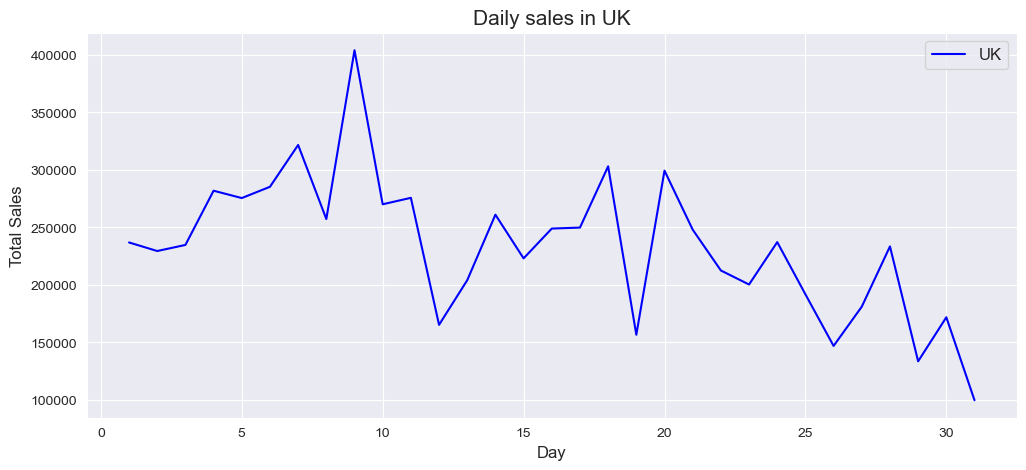

In [108]:
# Visualize daily sales in UK

plt.figure(figsize=(12,5))
uk_data.groupby(['Day'])['Amount'].sum().plot(kind='line',label='UK',color='blue')
plt.xlabel('Day',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Daily sales in UK', size=15)
plt.legend(fontsize=12)
plt.show()

/var/folders/hc/c66q24wx4_x12kfddz7rssm40000gn/T/ipykernel_39259/2794216437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data['Hour'] = uk_data['InvoiceDate'].dt.hour


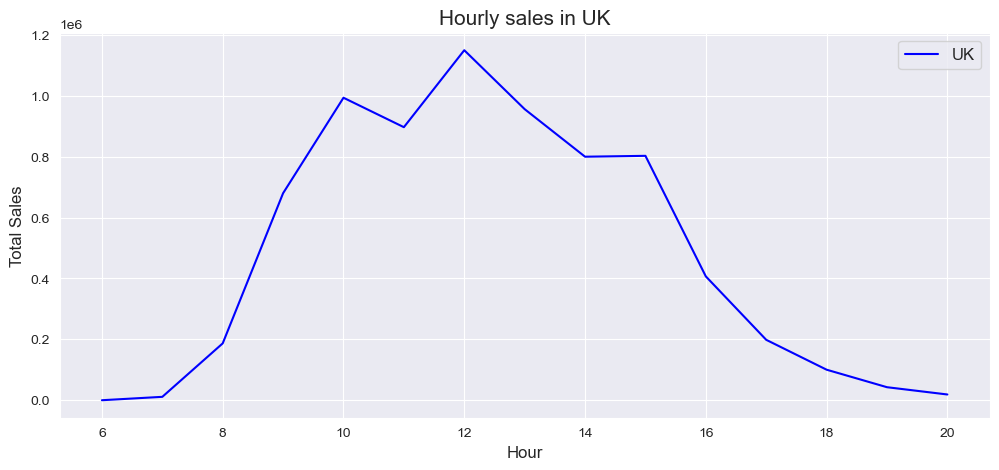

In [114]:
uk_data['Hour'] = uk_data['InvoiceDate'].dt.hour
plt.figure(figsize=(12,5))
uk_data.groupby(['Hour'])['Amount'].sum().plot(kind='line',label='UK',color='blue')
plt.xlabel('Hour',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Hourly sales in UK', size=15)
plt.legend(fontsize=12)
plt.show()

## Part 3: Cohort Analysis

*Track and Study user engagement over time. A cohort is a group of users who perform a certain sequence of events within a particular timeframe.*

**How do markerts use Cohort Analysis?**

**Cohort analysis** is useful to identify `trends within customer behavior` that may be hidden when looking at more general analytics data. For example, overall analytics data may indicate an increasing number of monthly purchases, a very positive sign for the business. However, **cohort analysis** can reveal that, in fact, the higher overall percentage is due to many first-time buyers, while cohorts of older customers are actually returning to make purchases much less frequently than in the past. Thus, by following the behavior of particular cohorts over time, a more accurate view of business performance is possible.

Likewise, when the company experiences a “bad month,” it is critical to understand if the unexpected performance drop was due to a market-wide factor (e.g., a quiet summer month) or to a specific problem that might be identified and adjusted. For example, if it is discovered that most new customers in a particular month spent much less than the customers acquired in previous months, it would be wise to examine any changes in acquisition strategy (e.g., traffic sources) and identify under-performers. 

*Types of cohorts:*

1. **Time Cohorts**: customers who signed up for a product or service during a particular time frame. Analyzing these cohorts shows the customers’ behavior depending on the **time** they started using the company’s products or services. The time may be monthly or quarterly even daily.

2. **Segment-based cohorts**: customers who purchased a product or subscribed to a service in the past. It groups customers by the **type of product or service** they signed up. Customers who signed up for basic level services might have different needs than those who signed up for advanced services. Understaning the needs of the various cohorts can help a company design custom-made services or products for particular segments.

3. **Size-based cohorts**: the various sizes of customers who purchase a company’s products or services. The customers may be small and startup businesses, middle-sized businesses, and enterprise-level businesses. Comparing the different categories of customers based on their size reveals **where the largest purchases come from**. For categories with the least purchases, the company can review any issues with the product and service offering and brainstorm areas for improvement that can boost the level of sales.

*For cohort analysis, there are a few labels that we have to create:*

-`Invoice Month`: A string representation of the year and month of a single transaction/invoice.

-`CohortMonth`: A string representation of the the year and month of a `customer’s first purchase`. This label is common across all invoices for a particular customer.

-`CohortPeriod`: A integer representation a customer’s stage in its `"lifetime"`. The number represents the number of months passed since the first purchase.

In [116]:
# copying the data into new df
df_cohort = uk_data.copy()

df_cohort.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,Amount,Year,Month,Day,Year-Month,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,15.30,2010,12,1,2010-12-01,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34,2010,12,1,2010-12-01,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,22.00,2010,12,1,2010-12-01,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34,2010,12,1,2010-12-01,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34,2010,12,1,2010-12-01,8


#### Invoice Month

In [117]:
# Create an 'Invoice Month'

import datetime as dt

def get_month(x):
    return dt.datetime(x.year, x.month,1)

df_cohort['InvoiceMonth'] = df_cohort['InvoiceDate'].apply(get_month)
df_cohort.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,Amount,Year,Month,Day,Year-Month,Hour,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,15.30,2010,12,1,2010-12-01,8,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34,2010,12,1,2010-12-01,8,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,22.00,2010,12,1,2010-12-01,8,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34,2010,12,1,2010-12-01,8,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34,2010,12,1,2010-12-01,8,2010-12-01


#### Cohort Month

In [118]:
# Create'Cohort Month'

# Use 'transofrm' to get the first time purchase date for each customer
df_cohort['CohortMonth'] = df_cohort.groupby('CustomerID')['InvoiceMonth'].transform('min')

df_cohort.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,Amount,Year,Month,Day,Year-Month,Hour,InvoiceMonth,CohortMonth
407745,571909,72232,FENG SHUI PILLAR CANDLE,12,2011-10-19 15:08:00,0.19,15006.0,United Kingdom,Completed,2.28,2011,10,19,2011-10-01,15,2011-10-01,2011-10-01
221572,556257,22993,SET OF 4 PANTRY JELLY MOULDS,3,2011-06-09 17:47:00,1.25,17576.0,United Kingdom,Completed,3.75,2011,6,9,2011-06-01,17,2011-06-01,2010-12-01
63201,541525,84946,ANTIQUE SILVER TEA GLASS ETCHED,72,2011-01-19 10:51:00,1.06,14090.0,United Kingdom,Completed,76.32,2011,1,19,2011-01-01,10,2011-01-01,2011-01-01
370110,569129,23103,JINGLE BELL HEART DECORATION,4,2011-09-30 13:40:00,1.65,15034.0,United Kingdom,Completed,6.60,2011,9,30,2011-09-01,13,2011-09-01,2010-12-01
471254,576626,23307,SET OF 60 PANTRY DESIGN CAKE CASES,3,2011-11-15 17:26:00,0.55,12890.0,United Kingdom,Completed,1.65,2011,11,15,2011-11-01,17,2011-11-01,2011-11-01


#### Cohort Period

In [119]:
# Create'Cohort Period'
# for this we create a function which calculates the number of month between their first purchase date and Invoice date

def diff_month(d1, d2):
    return((d1.dt.year - d2.dt.year) * 12 + d1.dt.month - d2.dt.month)

df_cohort['CohortPeriod'] = diff_month(df_cohort['InvoiceMonth'], df_cohort['CohortMonth'])

In [120]:
df_cohort.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,Amount,Year,Month,Day,Year-Month,Hour,InvoiceMonth,CohortMonth,CohortPeriod
535174,581191,23571,TRADITIONAL NAUGHTS & CROSSES,1,2011-12-07 16:56:00,1.65,17449.0,United Kingdom,Completed,1.65,2011,12,7,2011-12-01,16,2011-12-01,2010-12-01,12
393817,570855,22577,WOODEN HEART CHRISTMAS SCANDINAVIAN,12,2011-10-12 14:56:00,0.85,17314.0,United Kingdom,Completed,10.20,2011,10,12,2011-10-01,14,2011-10-01,2011-01-01,9
114625,546031,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-03-09 09:11:00,3.75,13267.0,United Kingdom,Completed,15.00,2011,3,9,2011-03-01,9,2011-03-01,2010-12-01,3
13013,537407,47580,TEA TIME DES TEA COSY,6,2010-12-06 14:55:00,2.55,15502.0,United Kingdom,Completed,15.30,2010,12,6,2010-12-01,14,2010-12-01,2010-12-01,0
276799,561077,20728,LUNCH BAG CARS BLUE,10,2011-07-24 15:53:00,1.65,17649.0,United Kingdom,Completed,16.50,2011,7,24,2011-07-01,15,2011-07-01,2011-07-01,0


In [121]:
# Based on 'first buy'and 'period to first buy' to list customerID

cohort_data = df_cohort.groupby(["CohortMonth","CohortPeriod"])["CustomerID"].apply(pd.Series.nunique).reset_index()
cohort_data.sort_values(by="CohortPeriod")

,CohortMonth,CohortPeriod,CustomerID
0,2010-12-01,0,814
88,2011-11-01,0,297
85,2011-10-01,0,323
81,2011-09-01,0,276
76,2011-08-01,0,141
...,...,...,...
10,2010-12-01,10,298
23,2011-01-01,10,127
24,2011-01-01,11,43
11,2010-12-01,11,404


In [122]:
# Use pivot_table to summarize the number of customer based on CohortMonth

customer_cohort = df_cohort.pivot_table(index='CohortMonth', columns='CohortPeriod', values='CustomerID', aggfunc='nunique')
customer_cohort

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,814.0,288.0,263.0,303.0,293.0,323.0,290.0,277.0,288.0,324.0,298.0,404.0,217.0
2011-01-01,357.0,75.0,93.0,84.0,117.0,99.0,90.0,86.0,106.0,117.0,127.0,43.0,NaN
2011-02-01,340.0,64.0,66.0,98.0,98.0,85.0,88.0,94.0,90.0,104.0,25.0,NaN,NaN
2011-03-01,419.0,64.0,109.0,83.0,94.0,69.0,111.0,96.0,119.0,38.0,NaN,NaN,NaN
2011-04-01,277.0,58.0,56.0,60.0,56.0,61.0,61.0,73.0,20.0,NaN,NaN,NaN,NaN
2011-05-01,256.0,48.0,44.0,44.0,53.0,58.0,68.0,23.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,214.0,38.0,31.0,51.0,51.0,69.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,168.0,30.0,33.0,39.0,47.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,141.0,31.0,32.0,34.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations:**

1. The above table show `retention`of customers.

2. Vertically i.e. **the first column '0'** tells how many **new customers the business acquired** in a particular month. eg: business acquired 814 new customers in Dec 2010, business acquired 358 new customers in Jan 2011, and so on.

3. Horizontally i.e the first row tells the number of customers who is continuing to be part of business since their first purchase i.e. Dec 2010. eg: 288 is the number of customers out of 814 that continued to purchase one month after their first purchase, 263 is the number of customers that continued to purchase two months after their first purchase, and so on.

### Create Retention Table

Based on the the date customers fisrt purchased items.

In [123]:
# Retention table

cohort_size = customer_cohort.iloc[:,0]
# Extract the first column 
retention = customer_cohort.divide(cohort_size,axis=0) 
# cohort_size: size of initial cohort(number of customers in the first period)
# axis=0 ensure each row is divided by the coresponding cohort size

retention.round(3)*100 
#to show the number as percentage

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,35.4,32.3,37.2,36.0,39.7,35.6,34.0,35.4,39.8,36.6,49.6,26.7
2011-01-01,100.0,21.0,26.1,23.5,32.8,27.7,25.2,24.1,29.7,32.8,35.6,12.0,NaN
2011-02-01,100.0,18.8,19.4,28.8,28.8,25.0,25.9,27.6,26.5,30.6,7.4,NaN,NaN
2011-03-01,100.0,15.3,26.0,19.8,22.4,16.5,26.5,22.9,28.4,9.1,NaN,NaN,NaN
2011-04-01,100.0,20.9,20.2,21.7,20.2,22.0,22.0,26.4,7.2,NaN,NaN,NaN,NaN
2011-05-01,100.0,18.8,17.2,17.2,20.7,22.7,26.6,9.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.8,14.5,23.8,23.8,32.2,9.8,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,17.9,19.6,23.2,28.0,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,22.0,22.7,24.1,12.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations:**

We can see that how the customer interactd with the business over time. eg: In Jan 2011 the business acquired some new customers but in one month only 21.2% were retained or revisited again. Then the number rise to 26% which means some customers returned and purchased again and the reason could be an invitation/offers was sent to those groups of customers.

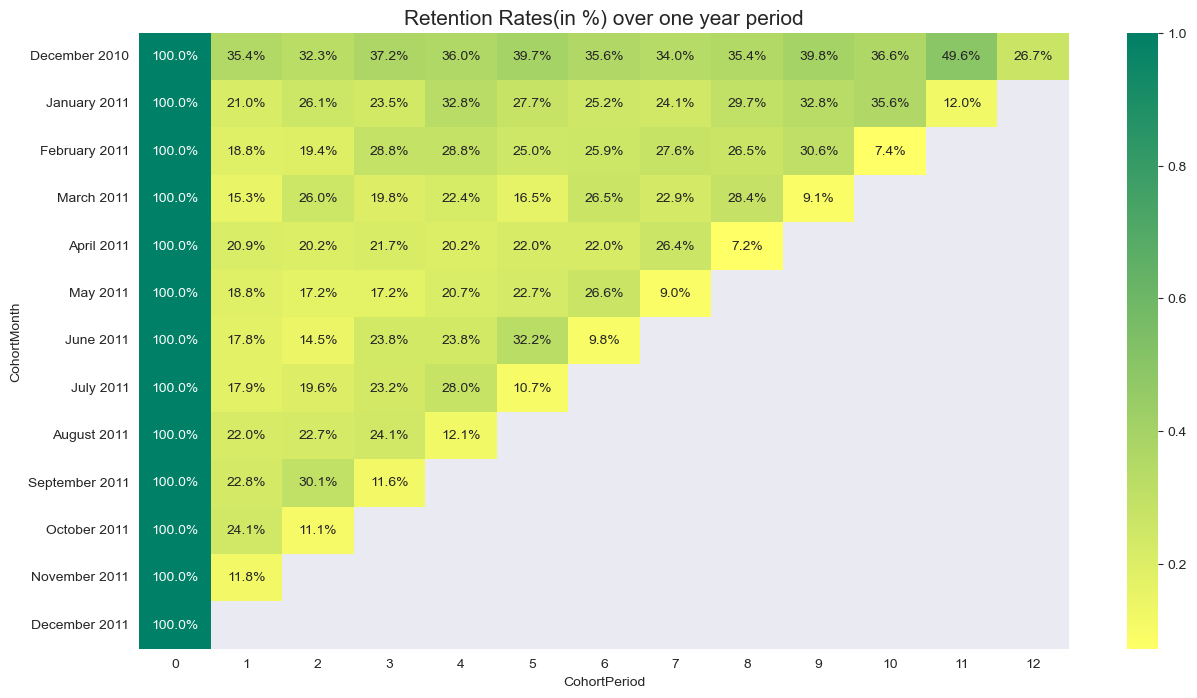

In [124]:
# Build the heatmap or pictorial representation of above table

plt.figure(figsize=(15, 8))
retention.index = retention.index.strftime("%B %Y")
plt.title('Retention Rates(in %) over one year period', size=15)
sns.heatmap(data=retention, annot = True, fmt = '.1%', cmap="summer_r")
plt.show()

In [125]:
# Use Pivot_table to summarize the average amount spent by customers based on CohortPeriod

amount_cohort = df_cohort.pivot_table(index='CohortMonth', columns='CohortPeriod', values='Amount', aggfunc='mean').round(2)
amount_cohort

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,21.18,22.45,23.97,23.77,20.22,25.05,25.92,23.86,25.97,31.43,30.81,21.64,24.46
2011-01-01,26.75,18.02,15.37,28.22,18.48,19.15,24.19,17.67,17.83,17.07,18.02,18.98,NaN
2011-02-01,17.15,20.04,18.36,19.31,17.55,16.12,21.43,22.64,18.24,21.97,23.92,NaN,NaN
2011-03-01,16.72,20.17,22.58,17.67,20.57,18.42,20.72,19.46,16.48,13.10,NaN,NaN,NaN
2011-04-01,16.52,20.08,19.26,18.67,19.09,14.11,14.93,15.30,11.54,NaN,NaN,NaN,NaN
2011-05-01,18.05,17.01,22.08,21.09,18.73,13.49,16.64,262.15,NaN,NaN,NaN,NaN,NaN
2011-06-01,22.92,15.25,19.64,16.56,13.34,13.31,12.73,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,14.77,24.68,10.29,12.91,9.30,9.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,15.15,11.96,10.80,13.69,15.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observation:**

1. The above table shows the average amount spent by the group of customers over the period of time.
2. eg: For the group of customers of Jan 2011 they initially spent 26.75 but after one month they spent 18.77 lower than the previous, then they spent 15.37 in a month and so on.
3. On Nov 2011, the average amount spent by customers were only 11.76, it could be related to the marketing campagin of this company.

### Sales Revenue By Cohort

In [126]:
# Use Pivot_table to summarize the lifetime revenue by customers based on CohortPeriod

amount_cohort_sum = df_cohort.pivot_table(index='CohortMonth', columns='CohortPeriod', values='Amount', aggfunc='sum').round(2)
amount_cohort_sum

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,496169.17,199079.84,183708.05,230746.27,176307.33,261906.92,249243.24,236168.46,256456.11,380295.46,348496.57,415132.93,155210.96
2011-01-01,241687.09,33732.54,39152.42,59320.16,58042.36,50231.11,57042.04,42256.85,60126.20,71706.53,100686.84,23994.95,NaN
2011-02-01,137022.97,25654.99,32876.28,44250.49,38635.88,30733.07,42543.95,56079.87,50732.97,57354.35,10071.18,NaN,NaN
2011-03-01,169683.44,27834.98,56812.62,37946.17,46418.87,34809.98,56645.81,61021.54,66330.74,12545.65,NaN,NaN,NaN
2011-04-01,109665.80,25945.60,22971.55,23003.50,24494.16,24878.53,26866.19,30805.32,5423.58,NaN,NaN,NaN,NaN
2011-05-01,94694.10,16599.21,16757.30,17272.21,25793.02,25174.85,27664.29,176949.76,NaN,NaN,NaN,NaN,NaN
2011-06-01,107150.30,12142.81,9957.49,20023.51,20848.65,29422.51,7511.61,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,60792.05,9600.26,11842.85,15494.86,14861.05,4283.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,56458.24,18315.65,28724.73,36155.98,12639.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations**:

The above table shows the total amount spent by customers by cohort. If we know how much money spent on marketing (Customer Acquisition Cost), we can find out the **Customer Lifetime Value** company can get from those customers.

**Customer Lifetime Value = Total Gross Profit/ Total clients**

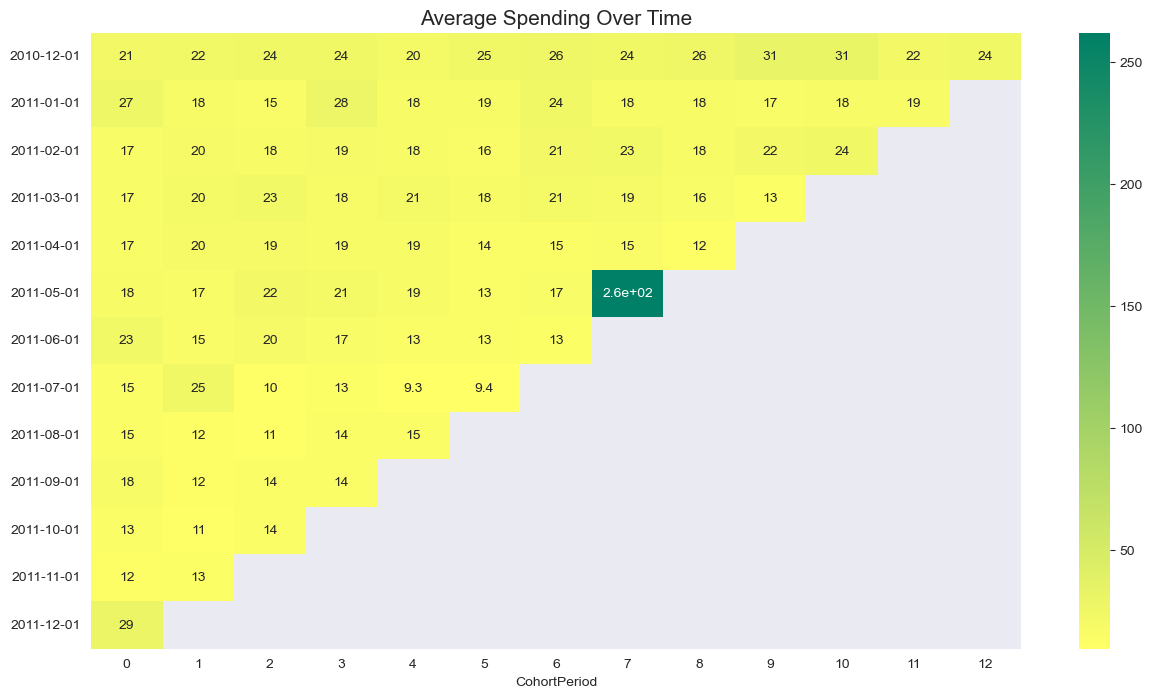

In [127]:
# Build the heatmap or pictorial representation of above table

amount_cohort.index = pd.to_datetime(amount_cohort.index).date
plt.figure(figsize=(15, 8))
plt.title('Average Spending Over Time', size=15)
sns.heatmap(data = amount_cohort, annot = True, cmap="summer_r")
plt.show()

## Part 4: RFM Analysis

#### It measures when people buy, how often they buy and how much they buy.

1. **Recency**: Time since last order or last engaged with the product. The more recent the purchase, the more responsive the customer is to promotions.
2. **Frequency**: How often a customer shops. The more frequent the customer buys, the more engaged and satisfied they are.
3. **Monetary**: Total amount spent by customers. It differenciates heavey-spenders from low-value purchasers.

The RFM Analysis helps identify:

1.	Who are your best customers?
2.	Which of your customers could contribute to your churn rate?
3.	Who has the potential to become valuable customers?
4.	Which of your customers can be retained?
5.	Which of your customers are most likely to respond to marketing campaign?

In [128]:
# copying the data in other df
df_rfm = df.copy()
# keeping only desired columns
df_rfm = df_rfm.iloc[:,:10]
df_rfm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34


In [129]:
# extracting the RECENCY

# Recent purchase date
recency = pd.DataFrame(df_rfm.groupby('CustomerID')['InvoiceDate'].max().reset_index())
recency

,CustomerID,InvoiceDate
0,12346.0,2011-01-18 10:01:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00
...,...,...
4329,18280.0,2011-03-07 09:52:00
4330,18281.0,2011-06-12 10:53:00
4331,18282.0,2011-12-02 11:43:00
4332,18283.0,2011-12-06 12:02:00


In [130]:
# Extract date from 'InvoiceDate'
recency['InvoiceDate'] = pd.to_datetime(recency['InvoiceDate']).dt.date

# The most recent day
recency['MaxDate'] = recency['InvoiceDate'].max()

# The time since last pay
recency['Recency'] = (recency['MaxDate'] - recency['InvoiceDate']).dt.days + 1
recency = recency[['CustomerID','Recency']]
recency.head()

,CustomerID,Recency
0,12346.0,326
1,12347.0,3
2,12348.0,76
3,12349.0,19
4,12350.0,311


In [131]:
# Extract the FREQUENCY

frequency = pd.DataFrame(df_rfm.groupby('CustomerID')['InvoiceNo'].nunique().reset_index())
frequency.columns = ['fCustomerID','Frequency']
frequency.head()

,fCustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [132]:
# Extract the MONETARY

monetary = pd.DataFrame(df_rfm.groupby('CustomerID')['Amount'].sum().reset_index())
monetary.columns = ['mCustomerID','Monetary']
monetary.head()

,mCustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1437.24
3,12349.0,1457.55
4,12350.0,294.40


In [133]:
# Combine the three into one table

rfm = pd.concat([recency,frequency,monetary], axis=1)
rfm.drop(['fCustomerID','mCustomerID'], axis=1, inplace=True)
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,3,7,4310.00
2,12348.0,76,4,1437.24
3,12349.0,19,1,1457.55
4,12350.0,311,1,294.40


### Rank Customers based on Recency, Frequency, Monetary

In [134]:
# Assign ranks to each value based on numerical order

rfm['R_rank'] = rfm['Recency'].rank(ascending=False)
# The higher recency should be assigned to lower rank

rfm['F_rank'] = rfm['Frequency'].rank(ascending=True)
# The lower frequency should be assigned to lower rank

rfm['M_rank'] = rfm['Monetary'].rank(ascending=True)

rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank
0,12346.0,326,1,77183.60,163.5,753.0,4326.0
1,12347.0,3,7,4310.00,4152.0,3712.0,4011.0
2,12348.0,76,4,1437.24,1644.0,3036.0,3121.0
3,12349.0,19,1,1457.55,3206.5,753.0,3134.0
4,12350.0,311,1,294.40,229.5,753.0,1036.0


In [135]:
# Normalize the rank of the customers
rfm['R_rank_norm'] = (rfm['R_rank']/rfm['R_rank'].max())*100
rfm['F_rank_norm'] = (rfm['F_rank']/rfm['F_rank'].max())*100
rfm['M_rank_norm'] = (rfm['F_rank']/rfm['M_rank'].max())*100

rfm.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,12346.0,326,1,77183.60,3.787352,17.374250,17.374250
1,12347.0,3,7,4310.00,96.177901,85.648362,85.648362
2,12348.0,76,4,1437.24,38.082001,70.050761,70.050761
3,12349.0,19,1,1457.55,74.276118,17.374250,17.374250
4,12350.0,311,1,294.40,5.316192,17.374250,17.374250


### RFM Scores

- Questions: How should we **Measure RFM Scores**? What's the percentage should be given to each metric? - To answer this question, we should consider the **nature of business**.

For example, in a consumer durable business, the Monetary value per transaction is normally high but frequency and recency is low. In this case, marketers should give more weight to monetary and recency rather than frequency.

If it's a retail business or online app, marketers should give more weight to recency and frequency than monatary.

Based on the case we work on here, the `average unitprice` is 3.47, so we can exclude it's a consumer durable business, therefore, we put more weight on recency and frequency.

- RFM Score is calculated based on Recency, Frequency, Monetary value normalize ranks. Based upon this score, we divide our customers. Here we rate them on a scale of 5.

- Formular used for calculating RFM Score is: **0.35 * R_score + 0.35 * F_score + 0.3 * M_score**

In [136]:
rfm['RFM_Score'] = 0.35*rfm['R_rank_norm']+0.35*rfm['F_rank_norm']+0.3*rfm['M_rank_norm']

# Adjust the scale of 'RFM score'
rfm['RFM_Score'] *= 0.05
rfm = rfm.round(2)
rfm[['CustomerID', 'RFM_Score']].head(7)

,CustomerID,RFM_Score
0,12346.0,0.63
1,12347.0,4.47
2,12348.0,2.94
3,12349.0,1.86
4,12350.0,0.66
5,12352.0,3.80
6,12353.0,0.86


In [137]:
rfm['RFM_Score'].describe()

count    4334.000000
mean        2.504001
std         1.270675
min         0.570000
25%         1.390000
50%         2.470000
75%         3.570000
max         5.000000
Name: RFM_Score, dtype: float64

### Rating Customer based on the RFM Score

1. RFM >= 3.5 : Top Customer
2. 3.5 > RFM >= 2.5 : High Value Customer
3. 2.5 > RFM >=2 : Medium value customer
4. 1.39 >= RFM >1.2 : Low-value customer
5. RFM <= 1.2 : Lost Customer

In [138]:
# np.where: create a new column

rfm["Customer_segment"] = np.where(rfm['RFM_Score'] >= 3.5, "Top Customers", 
                                   (np.where(rfm['RFM_Score'] >= 2.5,"High value Customer",
                                (np.where(rfm['RFM_Score'] >= 2,"Medium Value Customer",
                                          np.where(rfm['RFM_Score'] >= 1.39, 'Low Value Customers', 'Lost Customers'))))))

rfm[['CustomerID', 'RFM_Score', 'Customer_segment']].head(10)

,CustomerID,RFM_Score,Customer_segment
0,12346.0,0.63,Lost Customers
1,12347.0,4.47,Top Customers
2,12348.0,2.94,High value Customer
3,12349.0,1.86,Low Value Customers
4,12350.0,0.66,Lost Customers
5,12352.0,3.80,Top Customers
6,12353.0,0.86,Lost Customers
7,12354.0,0.81,Lost Customers
8,12355.0,0.84,Lost Customers
9,12356.0,3.17,High value Customer


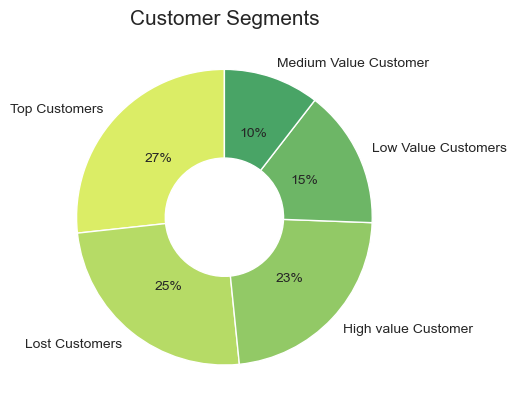

In [139]:
# Specify the color map ('summer_r' in this case)
colors = sns.color_palette("summer_r")

# Create the pie chart using Matplotlib
plt.pie(rfm['Customer_segment'].value_counts(), labels=rfm['Customer_segment'].value_counts().index,
        autopct='%.0f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.6))

# Add annotations (percentage labels) on each pie slice
plt.gca().set_aspect('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title('Customer Segments', size=15)
plt.show()


### Observations:

The Top Customers represent 27%, which can be referred as loyal customers. Business should target more on High value customers and Medium Value customers, to ensure they will become loyal customers.
For Low value customers, company could try to increase their value by offering them incentives, discounts or personalized recommendations.

### Ongoing monitor on Customer Segmentation:

Customer segmentation is not a one-time activity, but a continuous process that requires regular monitoring and evaluation. Business should track and measure the performance of each segment over time, using key performance indicators (KPIs), such as revenue, profit, retention, churn, satisfaction, or loyalty. Business should also update segments periodically, using new or updated data, to reflect changes in customer behavior, preferences, needs, or market conditions. Business should also test and experiment with different segmentation methods, criteria, or variables, to find the best fit for your business and customers.